In [1]:
from wind_ae.wrapper.relax_wrapper import wind_simulation as wind_sim
from wind_ae.wrapper.wrapper_utils import constants as const

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pylab as pylab
import wind_ae.McAstro.atoms.atomic_species as McAtom

In [4]:
sim = wind_sim()
sim.load_planet('data/deeper_54_ramped.csv')

sim_high = wind_sim()
sim_high.load_uservars('data/54.99Me_1.85Re_higherT.csv')


sim_skin = wind_sim()
sim_skin.load_uservars('data/54.99Me_1.85Re_skinT.csv')

         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.
Atmosphere Composition
  Species:   HI,        HeI
  Mass frac: 8.00e-01, 2.00e-01

         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.
         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.


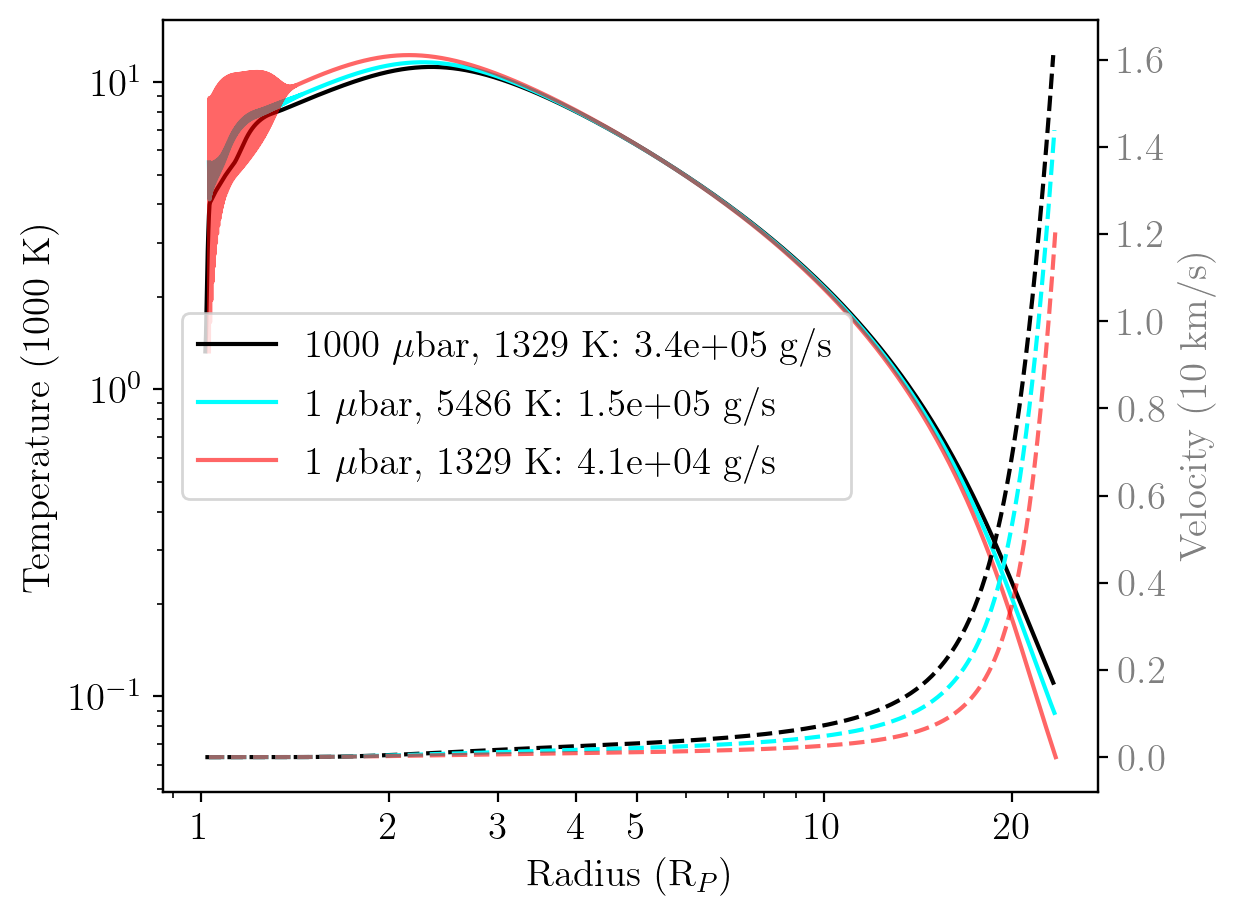

In [ ]:
fig, ax1 = plt.subplots()

color = 'k'
ax1.set_xlabel(r'Radius (R$_P$)')
ax1.set_ylabel('Temperature (1000 K)', color=color)
ax1.plot(sim.windsoln.soln_norm['r'], sim.windsoln.soln['T']/1000, color=color,label=r'1000 $\mu$bar, %.0f K: %.1e g/s'%(sim.windsoln.T_rmin*1e4,sim.windsoln.Mdot))
ax1.plot(sim_high.windsoln.soln_norm['r'], sim_high.windsoln.soln['T']/1000, color='aqua',label=r'1 $\mu$bar, %.0f K: %.1e g/s'%(sim_high.windsoln.T_rmin*1e4,sim_high.windsoln.Mdot))
ax1.plot(sim_skin.windsoln.soln_norm['r'], sim_skin.windsoln.soln['T']/1000, color='red',alpha=0.6,label=r'1 $\mu$bar, %.0f K: %.1e g/s'%(sim_skin.windsoln.T_rmin*1e4,sim_skin.windsoln.Mdot))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xticks([1,2,3,4,5,10,20],['1','2','3','4','5','10','20'])
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='center left')

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Velocity (10 km/s)', color='gray')  # we already handled the x-label with ax1
ax2.plot(sim.windsoln.soln_norm['r'], sim.windsoln.soln['v']/1e5, color='k',ls='dashed')
ax2.plot(sim_high.windsoln.soln_norm['r'], sim_high.windsoln.soln['v']/100000, color='aqua',ls='dashed')
ax2.plot(sim_skin.windsoln.soln_norm['r'], sim_skin.windsoln.soln['v']/100000, color='red',alpha=0.6,ls='dashed')
ax2.tick_params(axis='y', labelcolor='gray')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()